In [1]:
import pandas as pd
import numpy as np
import string

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from datasets import load_dataset

dataset = load_dataset("dalopeza98/isear-cleaned-dataset")

In [3]:
train_dataset = dataset['train']
df_train = pd.DataFrame(train_dataset)

In [4]:
test_dataset = dataset['test']
df_test = pd.DataFrame(test_dataset)

In [5]:
df_train.head()

,text,label
0,I was at home alone and my mother had asked me...,2
1,The day the results of the certificate exam ca...,2
2,"On New Year's Eve, when I went to the house of...",6
3,When I had to undergo the final examination of...,4
4,A friend told me that he had suffered in love ...,5


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6027 entries, 0 to 6026
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    6027 non-null   object
 1   label   6027 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 94.3+ KB


In [7]:
# different labels
df_train['label'].unique()

array([2, 6, 4, 5, 1, 0, 3])

In [8]:
# average sentence length
df_train['text'].str.split().str.len().mean()

22.60892649742824

In [33]:
# creating a labels dict for the emotions
labels_dict = {0:'anger', 1:'disgust', 2:'fear', 3:'guilt', 4:'joy', 5:'sadness', 6:'shame'}
df_train['description'] = df_train['label'].map(labels_dict )
df_train.head()

,text,label,description,text_word_count
0,I was at home alone and my mother had asked me...,2,fear,45
1,The day the results of the certificate exam ca...,2,fear,54
2,"On New Year's Eve, when I went to the house of...",6,shame,18
3,When I had to undergo the final examination of...,4,joy,33
4,A friend told me that he had suffered in love ...,5,sadness,18


In [34]:
df_train['description'].value_counts()

description
joy        870
anger      869
fear       867
sadness    864
disgust    856
guilt      852
shame      849
Name: count, dtype: int64

/tmp/ipykernel_1981569/513186330.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='description',


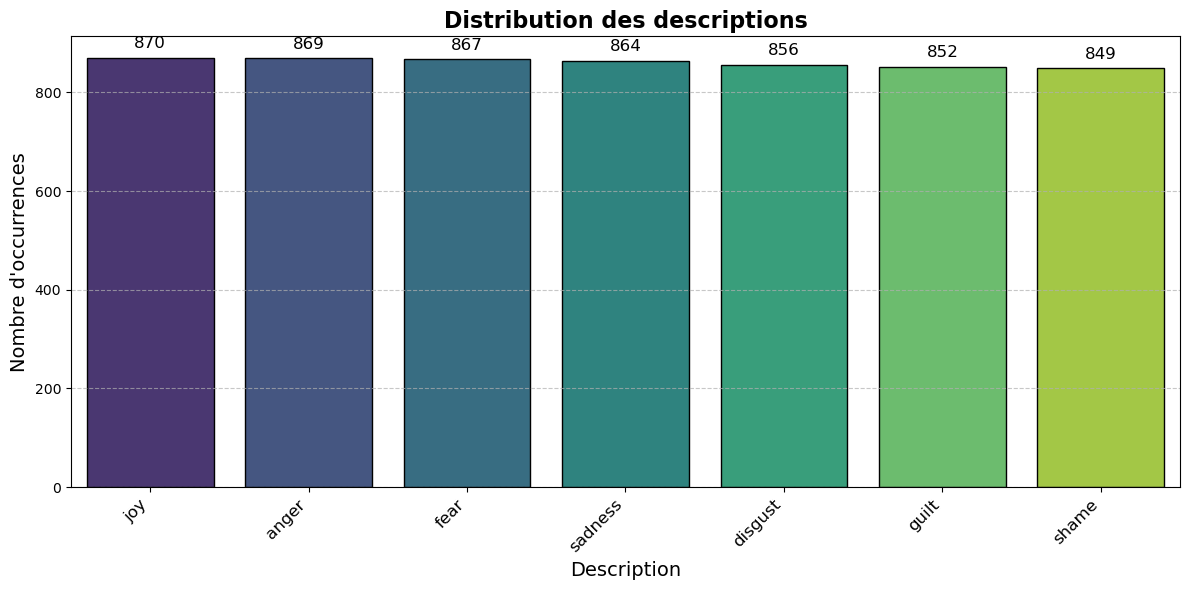

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Définir la taille du graphique
plt.figure(figsize=(12, 6))

# Créer le countplot avec des personnalisations
sns.countplot(x='description', 
              order=df_train['description'].value_counts(normalize=True).index,
              data=df_train, 
              palette='viridis',  # Choisir une palette de couleurs
              edgecolor='black')  # Ajouter des bordures aux barres

# Ajouter un titre et des labels
plt.title('Distribution des descriptions', fontsize=16, fontweight='bold')
plt.xlabel('Description', fontsize=14)
plt.ylabel('Nombre d\'occurrences', fontsize=14)

# Ajouter une grille pour une meilleure lisibilité
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rotation des étiquettes de l'axe x pour une meilleure lisibilité
plt.xticks(rotation=45, ha='right', fontsize=12)

# Afficher les valeurs au-dessus des barres
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', 
                       xytext=(0, 10), 
                       textcoords='offset points',
                       fontsize=12)

# Ajuster les marges pour éviter que les étiquettes ne soient coupées
plt.tight_layout()

# Afficher le graphique
plt.show()

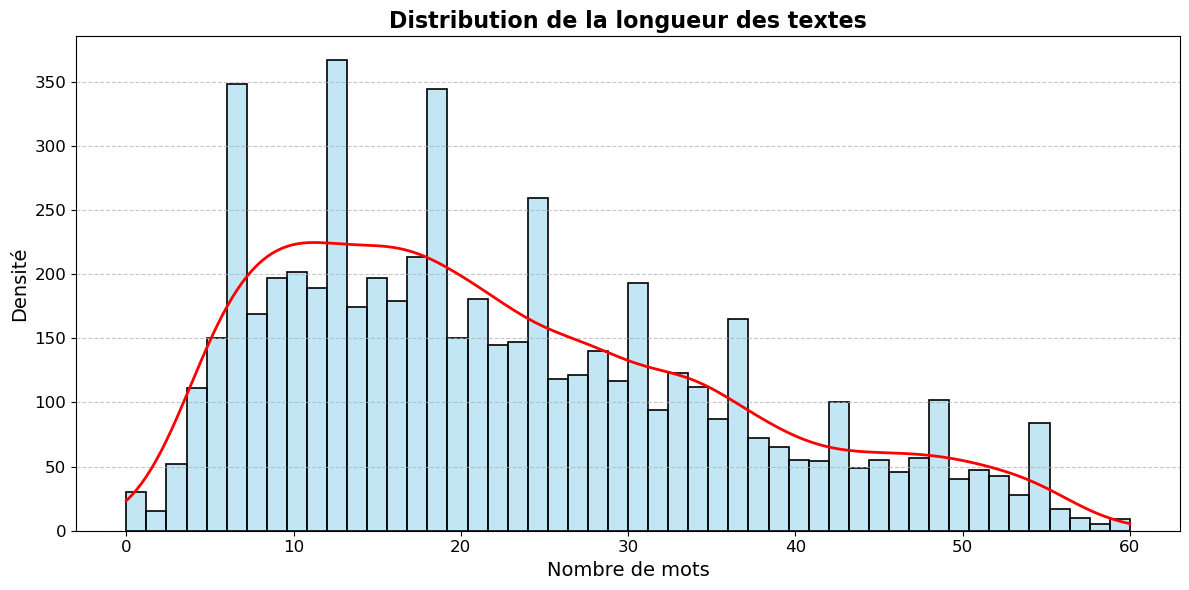

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la longueur des textes
df_train['text_word_count'] = df_train['text'].str.split().str.len()

# Définir la taille du graphique
plt.figure(figsize=(12, 6))

# Créer l'histogramme avec des personnalisations
sns.histplot(df_train['text_word_count'], 
             bins=50, 
             kde=True, 
             color='skyblue',  # Choisir une couleur
             edgecolor='black',  # Ajouter des bordures aux barres
             linewidth=1.2)  # Épaisseur des bordures

# Ajouter un titre et des labels
plt.title('Distribution de la longueur des textes', fontsize=16, fontweight='bold')
plt.xlabel('Nombre de mots', fontsize=14)
plt.ylabel('Densité', fontsize=14)

# Ajouter une grille pour une meilleure lisibilité
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Personnaliser l'axe x pour une meilleure lisibilité
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Afficher la ligne KDE (estimation de la densité) avec une couleur différente
plt.gca().lines[0].set_color('red')  # Changer la couleur de la ligne KDE
plt.gca().lines[0].set_linewidth(2)  # Épaisseur de la ligne KDE

# Ajuster les marges pour une meilleure présentation
plt.tight_layout()

# Afficher le graphique
plt.show()

In [48]:
# Creating individual dataframes of different emotions
labels_dict = {0:'anger', 1:'disgust', 2:'fear', 3:'guilt', 4:'joy', 5:'sadness', 6:'shame'}
anger = df_train[df_train['label']==0]['text']
disgust = df_train[df_train['label']==1]['text']
fear = df_train[df_train['label']==2]['text']
guilt = df_train[df_train['label']==3]['text']
joy = df_train[df_train['label']==4]['text']
sadness = df_train[df_train['label']==5]['text']
shame = df_train[df_train['label']==6]['text']

In [49]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [53]:
# calculating unigrmas and bigrams for all given emotions

sad_unigrams = get_top_n_gram(sadness.values,(1,1),5)
joy_unigrams= get_top_n_gram(joy.values,(1,1),5)
fear_unigrams= get_top_n_gram(fear.values,(1,1),5)
anger_unigrams= get_top_n_gram(anger.values,(1,1),5)
disgust_unigrams= get_top_n_gram(disgust.values,(1,1),5)
guilt_unigrams= get_top_n_gram(guilt.values,(1,1),5)
shame_unigrams= get_top_n_gram(shame.values,(1,1),5)

sad_bigrams = get_top_n_gram(sadness.values,(2,2),5)
joy_bigrams= get_top_n_gram(joy.values,(2,2),5)
fear_bigrams= get_top_n_gram(fear.values,(2,2),5)
anger_bigrams= get_top_n_gram(anger.values,(2,2),5)
disgust_bigrams= get_top_n_gram(disgust.values,(2,2),5)
guilt_bigrams= get_top_n_gram(guilt.values,(2,2),5)
shame_bigrams= get_top_n_gram(shame.values,(2,2),5)

sad_trigrams = get_top_n_gram(sadness.values,(3,3),5)
joy_trigrams= get_top_n_gram(joy.values,(3,3),5)
fear_trigrams= get_top_n_gram(fear.values,(3,3),5)
anger_trigrams= get_top_n_gram(anger.values,(3,3),5)
disgust_trigrams= get_top_n_gram(disgust.values,(3,3),5)
guilt_trigrams= get_top_n_gram(guilt.values,(3,3),5)
shame_trigrams= get_top_n_gram(shame.values,(3,3),5)

In [54]:
# Function to create a subplot for n-grams with consistent color
def plot_n_grams(subplot, top_n_grams, title, emotion, color):
    words, freqs = zip(*top_n_grams)
    subplot.bar(words, freqs, color=color)
    subplot.set_title(f'{title} for {emotion.capitalize()}')
    subplot.set_xticklabels(words, rotation=45, ha='right')

/tmp/ipykernel_1981569/3630645375.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  subplot.set_xticklabels(words, rotation=45, ha='right')
/tmp/ipykernel_1981569/3630645375.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  subplot.set_xticklabels(words, rotation=45, ha='right')
/tmp/ipykernel_1981569/3630645375.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  subplot.set_xticklabels(words, rotation=45, ha='right')


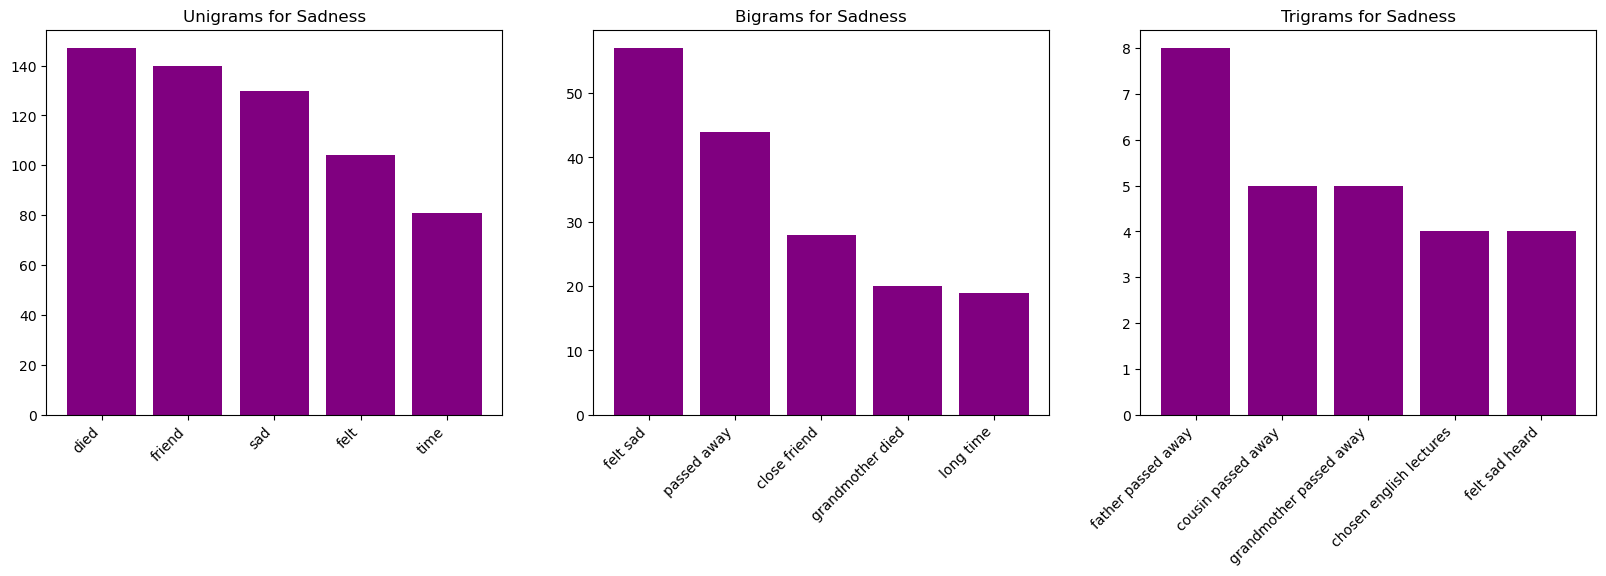

In [55]:
# Sadness n-grams
consistent_color = 'purple'

# Prepare figure for subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Plotting the n-grams
plot_n_grams(axs[0], sad_unigrams, 'Unigrams', 'sadness', consistent_color)
plot_n_grams(axs[1], sad_bigrams, 'Bigrams', 'sadness', consistent_color)
plot_n_grams(axs[2], sad_trigrams, 'Trigrams', 'sadness', consistent_color)

# Show the plot
plt.show()

/tmp/ipykernel_1981569/3630645375.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  subplot.set_xticklabels(words, rotation=45, ha='right')
/tmp/ipykernel_1981569/3630645375.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  subplot.set_xticklabels(words, rotation=45, ha='right')
/tmp/ipykernel_1981569/3630645375.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  subplot.set_xticklabels(words, rotation=45, ha='right')


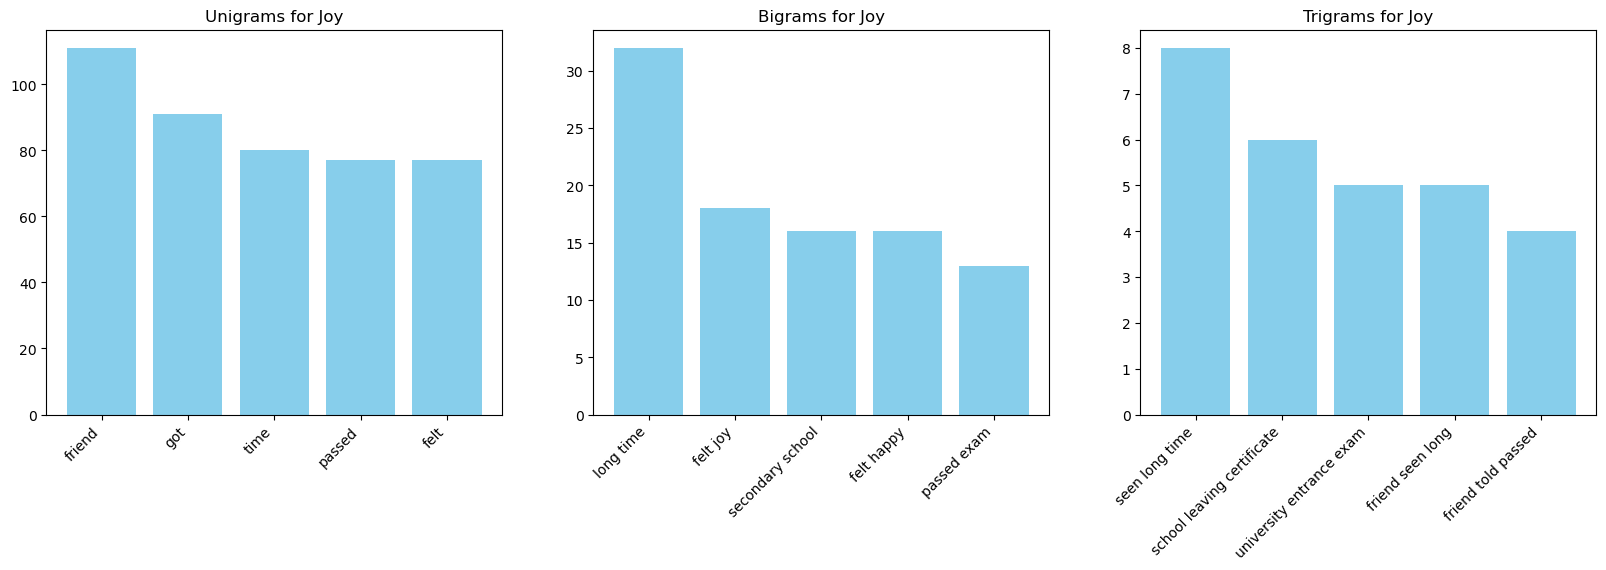

In [56]:
# Joy n-grams
consistent_color = 'skyblue'

# Prepare figure for subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Plotting the n-grams
plot_n_grams(axs[0], joy_unigrams, 'Unigrams', 'joy', consistent_color)
plot_n_grams(axs[1], joy_bigrams, 'Bigrams', 'joy', consistent_color)
plot_n_grams(axs[2], joy_trigrams, 'Trigrams', 'joy', consistent_color)

# Show the plot
plt.show()

/tmp/ipykernel_1981569/3630645375.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  subplot.set_xticklabels(words, rotation=45, ha='right')
/tmp/ipykernel_1981569/3630645375.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  subplot.set_xticklabels(words, rotation=45, ha='right')
/tmp/ipykernel_1981569/3630645375.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  subplot.set_xticklabels(words, rotation=45, ha='right')


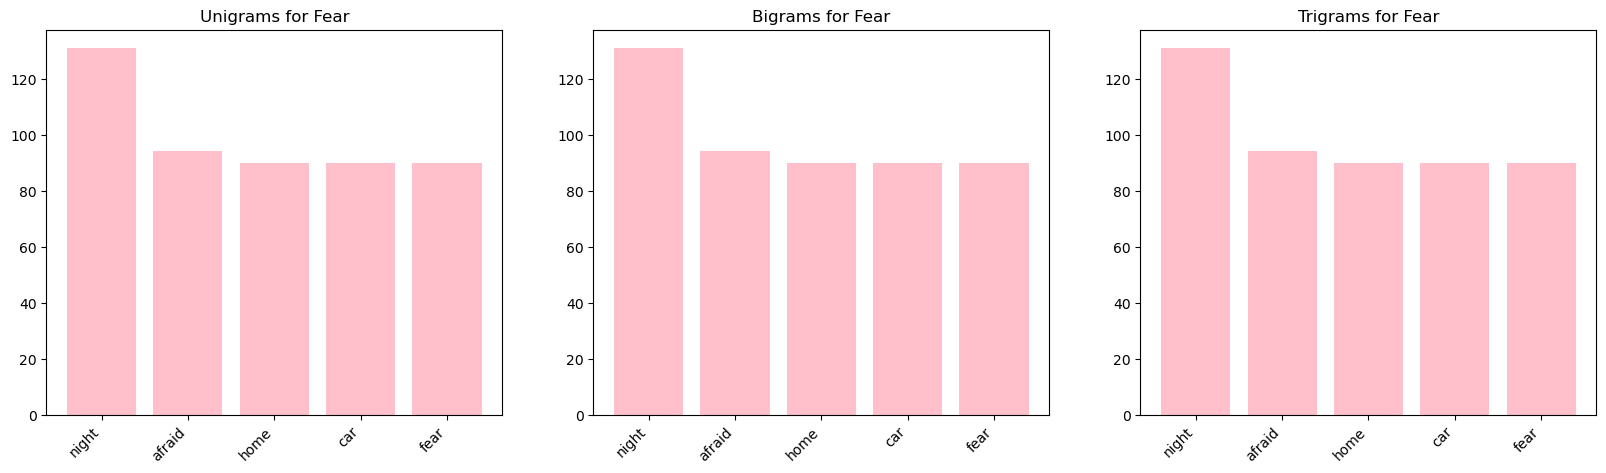

In [57]:
# Love n-grams
consistent_color = 'pink'

# Prepare figure for subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Plotting the n-grams
plot_n_grams(axs[0], fear_unigrams, 'Unigrams', 'fear', consistent_color)
plot_n_grams(axs[1], fear_unigrams, 'Bigrams', 'fear', consistent_color)
plot_n_grams(axs[2], fear_unigrams, 'Trigrams', 'fear', consistent_color)

# Show the plot
plt.show()

/tmp/ipykernel_1981569/3630645375.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  subplot.set_xticklabels(words, rotation=45, ha='right')
/tmp/ipykernel_1981569/3630645375.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  subplot.set_xticklabels(words, rotation=45, ha='right')
/tmp/ipykernel_1981569/3630645375.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  subplot.set_xticklabels(words, rotation=45, ha='right')


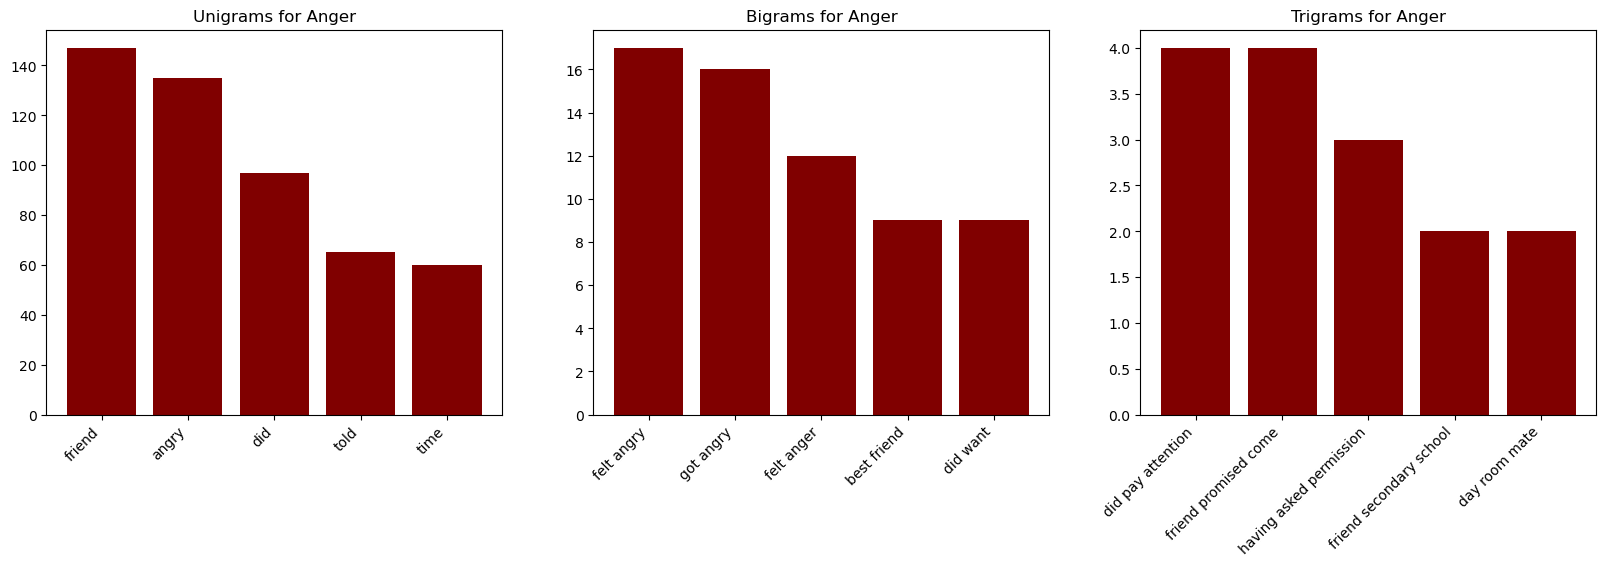

In [58]:
# Anger n-grams
consistent_color = 'maroon'

# Prepare figure for subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Plotting the n-grams
plot_n_grams(axs[0], anger_unigrams, 'Unigrams', 'anger', consistent_color)
plot_n_grams(axs[1], anger_bigrams, 'Bigrams', 'anger', consistent_color)
plot_n_grams(axs[2], anger_trigrams, 'Trigrams', 'anger', consistent_color)

# Show the plot
plt.show()

/tmp/ipykernel_1981569/3630645375.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  subplot.set_xticklabels(words, rotation=45, ha='right')
/tmp/ipykernel_1981569/3630645375.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  subplot.set_xticklabels(words, rotation=45, ha='right')
/tmp/ipykernel_1981569/3630645375.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  subplot.set_xticklabels(words, rotation=45, ha='right')


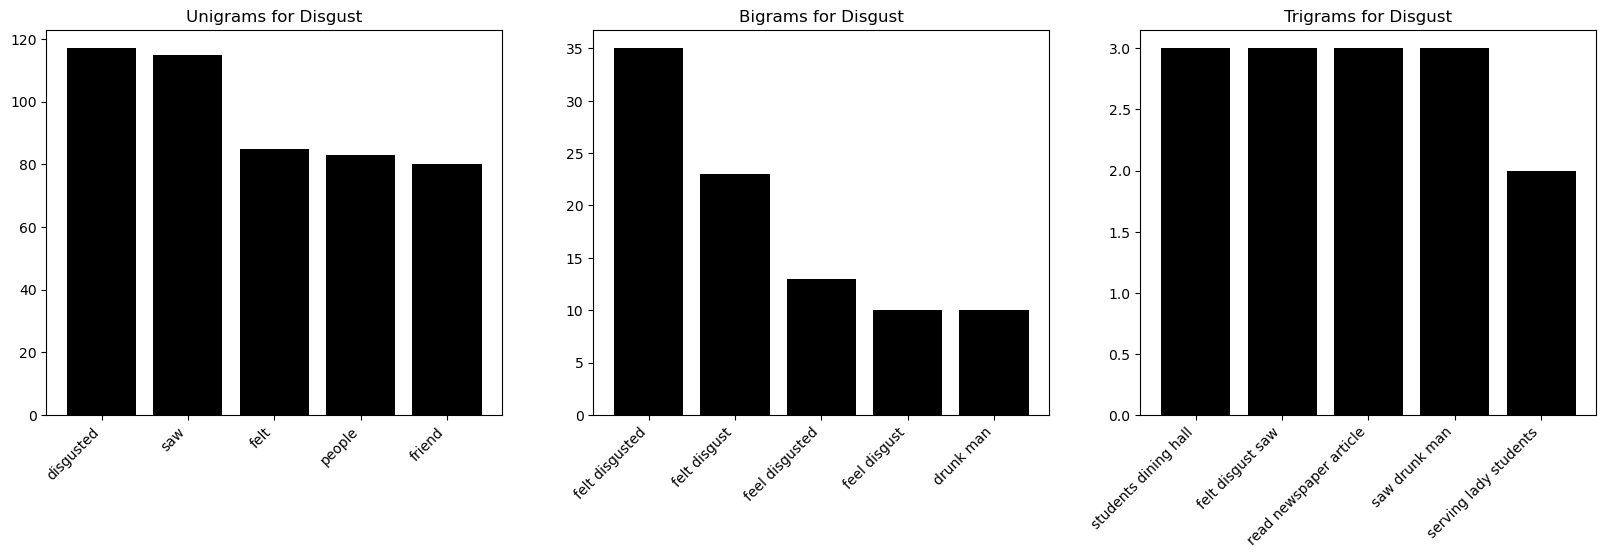

In [59]:
# Fear n-grams
consistent_color = 'black'

# Prepare figure for subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Plotting the n-grams
plot_n_grams(axs[0], disgust_unigrams, 'Unigrams', 'disgust', consistent_color)
plot_n_grams(axs[1], disgust_bigrams, 'Bigrams', 'disgust', consistent_color)
plot_n_grams(axs[2], disgust_trigrams, 'Trigrams', 'disgust', consistent_color)

# Show the plot
plt.show()

/tmp/ipykernel_1981569/3630645375.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  subplot.set_xticklabels(words, rotation=45, ha='right')
/tmp/ipykernel_1981569/3630645375.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  subplot.set_xticklabels(words, rotation=45, ha='right')
/tmp/ipykernel_1981569/3630645375.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  subplot.set_xticklabels(words, rotation=45, ha='right')


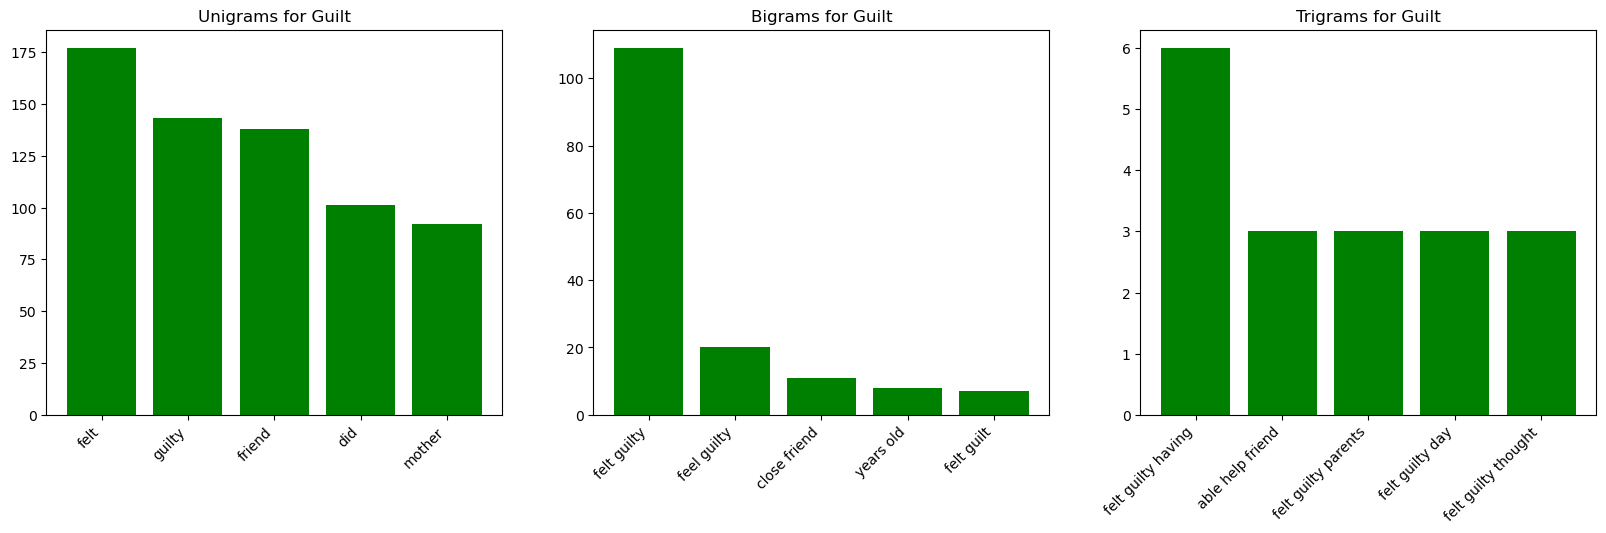

In [60]:
# Surprise n-grams
consistent_color = 'green'

# Prepare figure for subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Plotting the n-grams
plot_n_grams(axs[0], guilt_unigrams, 'Unigrams', 'guilt', consistent_color)
plot_n_grams(axs[1], guilt_bigrams, 'Bigrams', 'guilt', consistent_color)
plot_n_grams(axs[2], guilt_trigrams, 'Trigrams', 'guilt', consistent_color)

# Show the plot
plt.show()

/tmp/ipykernel_1981569/3630645375.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  subplot.set_xticklabels(words, rotation=45, ha='right')
/tmp/ipykernel_1981569/3630645375.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  subplot.set_xticklabels(words, rotation=45, ha='right')
/tmp/ipykernel_1981569/3630645375.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  subplot.set_xticklabels(words, rotation=45, ha='right')


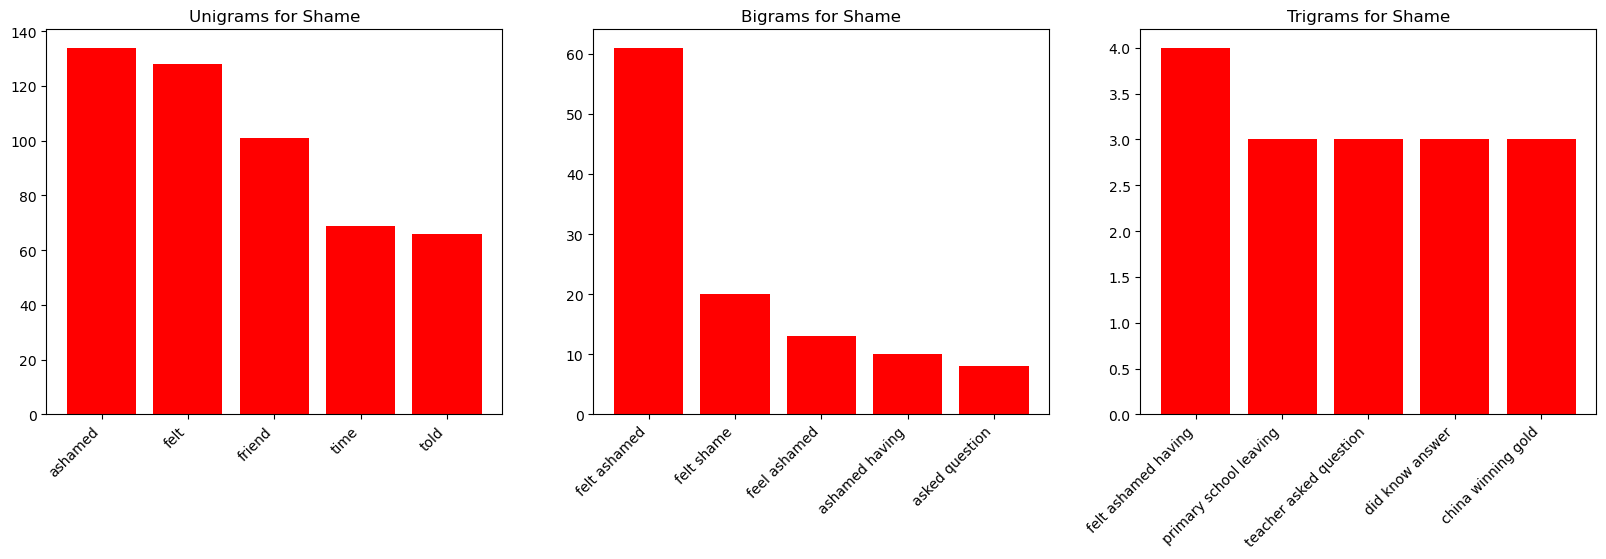

In [61]:
# Surprise n-grams
consistent_color = 'red'

# Prepare figure for subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Plotting the n-grams
plot_n_grams(axs[0], shame_unigrams, 'Unigrams', 'shame', consistent_color)
plot_n_grams(axs[1], shame_bigrams, 'Bigrams', 'shame', consistent_color)
plot_n_grams(axs[2], shame_trigrams, 'Trigrams', 'shame', consistent_color)

# Show the plot
plt.show()